Examples illustrating usage of dautils on the credit approval data set
https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/

Acknowledgements

Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science. 

Quinlan, "Simplifying decision trees", Int J Man-Machine Studies 27, Dec 1987, pp. 221-234.

Quinlan, "C4.5: Programs for Machine Learning", Morgan Kaufmann, Oct 1992

In [1]:
from dautils import sift, removeOutliers, missingStats, relMat, tladder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/
columnNames = ['A' + str(x) for x in range(1, 17)]
# missing values are denoated as '?' per dataset documentation
# see https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.names
df = pd.read_csv('crx.data', sep=',', header=-1, names=columnNames, na_values='?')

In [2]:
# See stats of missing/inf values in df
_ = missingStats(df)

Looking for missing values of input with 690 rows.
   column     type  inf      null
0     A14  float64  0.0  1.884058
1      A1   object  0.0  1.739130
2      A2  float64  0.0  1.739130
3      A6   object  0.0  1.304348
4      A7   object  0.0  1.304348
5      A5   object  0.0  0.869565
6      A4   object  0.0  0.869565
7     A16   object  0.0  0.000000
8     A10   object  0.0  0.000000
9      A8  float64  0.0  0.000000
10    A11    int64  0.0  0.000000
11    A15    int64  0.0  0.000000
12     A3  float64  0.0  0.000000
13    A13   object  0.0  0.000000
14    A12   object  0.0  0.000000
15     A9   object  0.0  0.000000


count    678.000000
mean      31.568171
std       11.957862
min       13.750000
1%        16.000000
25%       22.602500
50%       28.460000
75%       38.230000
99%       68.785000
max       80.250000
Name: A2, dtype: float64


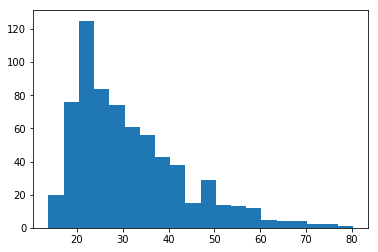

In [3]:
# What does A2 look like?
feature = 'A2'
print(df[feature].describe([0.01, 0.25, 0.5, 0.75, 0.99]))
plt.hist(df[feature].dropna(), 20);
rawValues = df[feature].dropna().values

In [4]:
# Assume we define "outliers" as values below and above the 0.5 and 99.5th percentiles
rawValuesClean, outliers, ioutlier = removeOutliers(rawValues, 0.01, top=True, bottom=True)
print(outliers)

# Assume we define "outliers" as values larger than the 99th percentile
rawValuesClean, outliers, ioutlier = removeOutliers(rawValues, 0.01, top=True, bottom=False)
print(outliers)

# Assume we define "outliers" as values smaller than the 1st percentile
rawValuesClean, outliers, ioutlier = removeOutliers(rawValues, 0.01, top=False, bottom=True)
print(outliers)

[15.83 15.17 74.83 13.75 80.25 76.75 73.42 15.83 15.75]
[71.58 69.17 69.5  74.83 80.25 76.75 73.42]
[15.83 15.92 16.   15.17 16.   13.75 15.83 15.75]


In [5]:
# drop missing valued rows for now
dfDropped = df.dropna()

# A16 is yes/no for credit approval
target = 'A16'
siftResults = sift(dfDropped, target, targetType='class')
siftResults.sort_values('feature', ascending=True, inplace=True)
pd.set_option('display.max_rows', 20)
print(siftResults)

# Set target as A8 (a continuous target)
siftResultsCont = sift(dfDropped, targetCol='A8', targetType='cont')
siftResultsCont.sort_values('effectMag', ascending=False, inplace=True)
print(siftResultsCont)

    feature                                       test             p  \
0        A1                                    CramerV  6.734086e-01   
1        A1   Binomial (p), effect p(y=+|x=a) / p(y=+)  6.731070e-01   
2        A1   Binomial (p), effect p(y=+|x=b) / p(y=+)  8.128949e-01   
3        A1   Binomial (p), effect p(y=-|x=a) / p(y=-)  6.731070e-01   
4        A1   Binomial (p), effect p(y=-|x=b) / p(y=-)  8.128949e-01   
5       A10                                    CramerV  1.916354e-30   
6       A10   Binomial (p), effect p(y=+|x=t) / p(y=+)  4.405063e-18   
7       A10   Binomial (p), effect p(y=+|x=f) / p(y=+)  5.016796e-15   
8       A10   Binomial (p), effect p(y=-|x=t) / p(y=-)  4.405063e-18   
9       A10   Binomial (p), effect p(y=-|x=f) / p(y=-)  5.016796e-15   
..      ...                                        ...           ...   
75       A7   Binomial (p), effect p(y=-|x=h) / p(y=-)  2.211549e-05   
76       A7   Binomial (p), effect p(y=-|x=v) / p(y=-)  3.285105

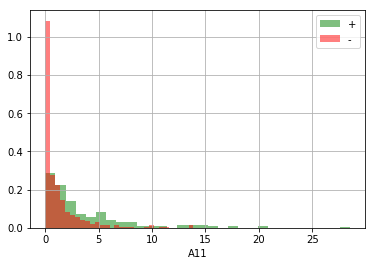

In [6]:
# Examine A8 to A16 relationship
feature = 'A8'
plt.hist(dfDropped[dfDropped[target] == '+'][feature], 30, alpha=0.5, color='g', label='+', density=True);
plt.hist(dfDropped[dfDropped[target] == '-'][feature], 30, alpha=0.5, color='r', label='-', density=True);
plt.legend();
plt.grid();
plt.xlabel('A11');

In [7]:
# Calculate relationship matrix across all dfDropped
relMat(dfDropped)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
A1,0.996426,0.734093,0.557916,0.067842,0.067842,0.357944,0.208516,0.434297,0.019935,0.061859,0.181125,0.048997,0.087412,0.466992,0.611554,0.016494
A2,0.734093,1.000000,0.128402,0.764510,0.764510,0.737741,0.829512,0.279058,0.755449,0.744773,0.140620,0.713102,0.758474,-0.017949,0.053792,0.753943
A3,0.557916,0.128402,1.000000,0.670966,0.670966,0.566742,0.618093,0.255318,0.596676,0.597319,0.195369,0.599071,0.718205,-0.283597,0.093468,0.601788
A4,0.067842,0.764510,0.670966,1.000000,1.000000,0.165191,0.366809,0.384092,0.140289,0.175103,0.174116,0.059756,0.358909,0.644911,0.647099,0.182644
A5,0.067842,0.764510,0.670966,1.000000,1.000000,0.165191,0.366809,0.384092,0.140289,0.175103,0.174116,0.059756,0.358909,0.644911,0.647099,0.182644
A6,0.357944,0.737741,0.566742,0.165191,0.165191,1.000000,0.591962,0.493678,0.330564,0.276165,0.186198,0.180486,0.207517,0.513376,0.614352,0.370763
A7,0.208516,0.829512,0.618093,0.366809,0.366809,0.591962,1.000000,0.518488,0.271319,0.125140,0.184850,0.159202,0.360312,0.513223,0.711084,0.256577
A8,0.434297,0.279058,0.255318,0.384092,0.384092,0.493678,0.518488,1.000000,0.553003,0.542338,0.314396,0.509275,0.315151,-0.024746,0.079070,0.568593
A9,0.019935,0.755449,0.596676,0.140289,0.140289,0.330564,0.271319,0.553003,0.996923,0.427494,0.507801,0.086785,0.121363,0.516180,0.660326,0.735745
A10,0.061859,0.744773,0.597319,0.175103,0.175103,0.276165,0.125140,0.542338,0.427494,0.996892,1.000000,0.017129,0.235306,0.543179,0.713295,0.448767


In [8]:
# Calculate relationship matrix across numerical columns of dfDropped
continuousColumns = ['A14', 'A2', 'A3', 'A8', 'A11', 'A15']
relMat(dfDropped, features=continuousColumns)

,A14,A2,A3,A8,A11,A15
A14,1.000000,-0.017949,-0.283597,-0.024746,-0.131224,-0.065493
A2,-0.017949,1.000000,0.128402,0.279058,0.140620,0.053792
A3,-0.283597,0.128402,1.000000,0.255318,0.195369,0.093468
A8,-0.024746,0.279058,0.255318,1.000000,0.314396,0.079070
A11,-0.131224,0.140620,0.195369,0.314396,1.000000,0.419384
A15,-0.065493,0.053792,0.093468,0.079070,0.419384,1.000000


count    653.000000
mean       4.829533
std        5.027077
min        0.000000
25%        1.040000
50%        2.835000
75%        7.500000
max       28.000000
Name: A3, dtype: float64
count    653.000000
mean       2.244296
std        3.371120
min        0.000000
25%        0.165000
50%        1.000000
75%        2.625000
max       28.500000
Name: A8, dtype: float64


C:\Users\Tom\Dropbox\Programming\dautils\dautils\dautils.py:210: UserWarning: Removing 1.9908116385911179% of data that is non-positive before analyzing.
  warnings.warn('Removing ' + str(percNP) + '% of data that is non-positive before analyzing.')


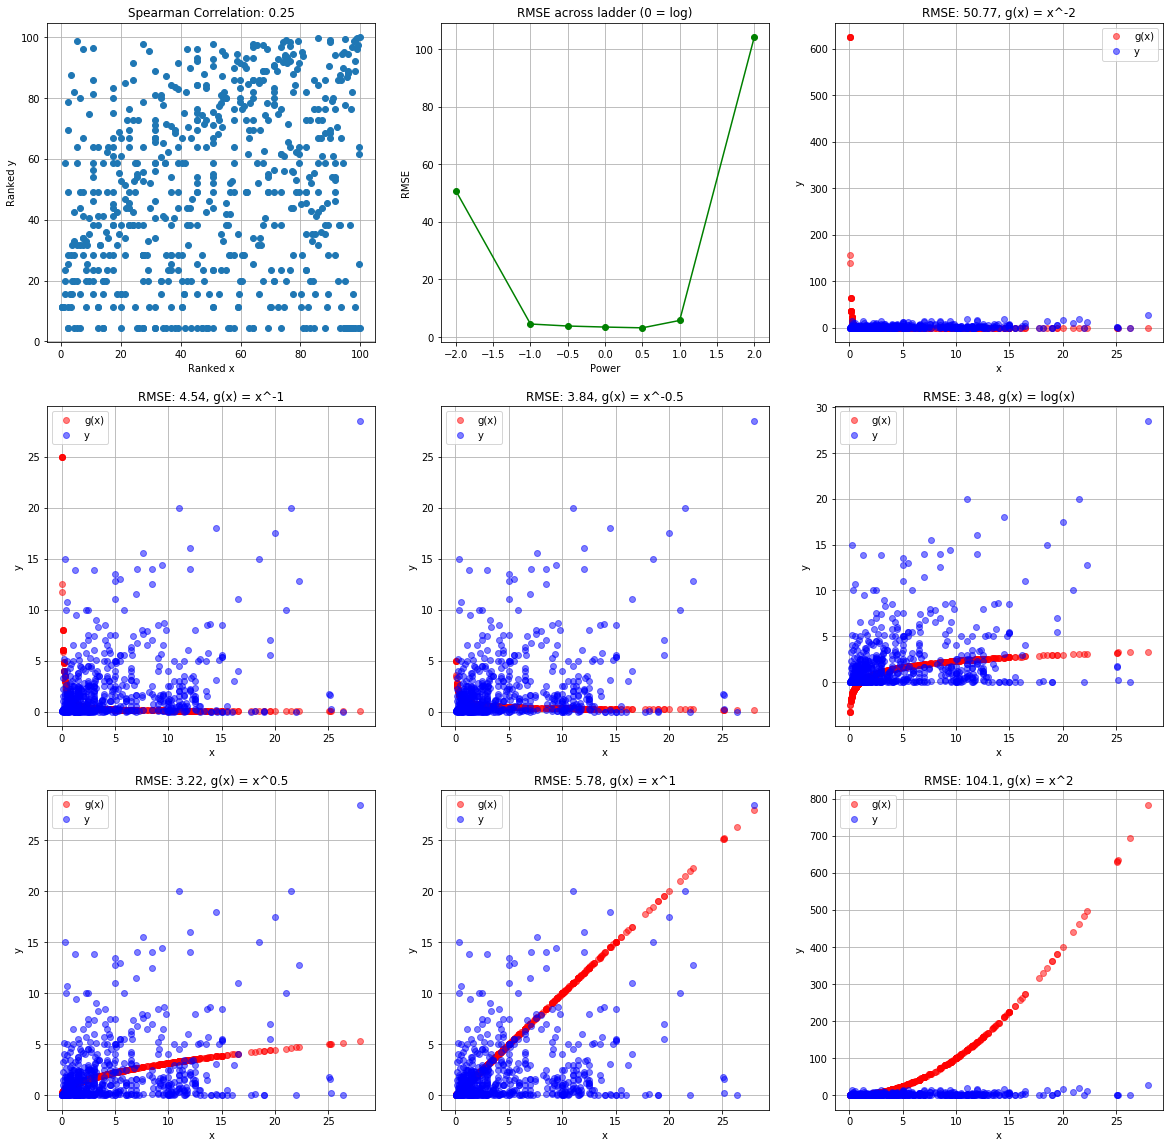

In [9]:
# Tukey's ladder on two continuous columns
print(dfDropped['A3'].describe())
print(dfDropped['A8'].describe())
y = dfDropped['A3'].values
x = dfDropped['A8'].values
tresults = tladder(y, x)